In [1]:
%matplotlib inline

import os
import sys
import math
import pandas as pd
import multiprocessing as mp
import matplotlib.pyplot as plt
from functools import partial

module_path = os.path.abspath(os.path.join('..'))
src_path = '{}/src'.format(module_path)
if module_path not in sys.path:
    sys.path.append(src_path)
    
from preprocessing import select
from consts import dataset, model_cols

plt.rcParams.update({'figure.max_open_warning': 0})

# Análises a cerca da base de dados

## Carregando bases
- Base inicial (com todas as instâncias)
- Base amostral (cerca de 8000 instâncias e 60 variáveis)

In [2]:
dataset_path = '{}/data/processed/dataset.csv'.format(module_path)
sample_path = '{}/data/processed/sample.csv'.format(module_path)

df_dataset = pd.read_csv(dataset_path)
df_sample = pd.read_csv(sample_path)

## Depressão x Região

In [3]:
a = df_dataset.query('Diagnosticado_Depressao == 1')['Regiao'].value_counts()
b = df_dataset.query('Diagnosticado_Depressao == 1 | Diagnosticado_Depressao == 2')['Regiao'].value_counts()
c = ((a / b) * 100)
cols = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantis',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco',
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia',
    31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 35: 'São Paulo',
    41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul', 51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

select(c.to_frame().transpose(), cols).transpose()

,Regiao
Rondônia,4.604486
Acre,5.292172
Amazonas,2.629544
Roraima,4.839723
Pará,2.694611
Amapá,3.828829
Tocantis,7.260726
Maranhão,3.551297
Piauí,4.656319
Ceará,5.078125


## Dados Ausentes

(a) Considerando todos os atributos;  
(b) Considerando um limiar de <= 80%.

In [4]:
n = df_sample.shape[0]
missing_vals = ((n - df_sample.count()) / df_sample.shape[0]) * 100
cols = { 0: 'Porcentagem' }

select(missing_vals.to_frame(), cols)

,Porcentagem
Regiao,0.000000
Diagnosticado_Depressao,0.000000
Defic_Intelectual,0.000000
Nasceu_Ou_Adquiriu_Defic_Intelectual,99.079103
Defic_Intelectual_Limita_Atividades,99.079103
Doença_Fisica_Cronica_Mental,0.000000
Visita_Medico,96.151122
Doença_Cerebral_Limita,96.151122
Esqz_Bipol_Psicose_TOC,0.000000
Psicoterapia_Doenca_Mental,96.151122


In [5]:
limiar = missing_vals[missing_vals <= 80]
select(limiar.to_frame(), cols)

,Porcentagem
Regiao,0.000000
Diagnosticado_Depressao,0.000000
Defic_Intelectual,0.000000
Doença_Fisica_Cronica_Mental,0.000000
Esqz_Bipol_Psicose_TOC,0.000000
Diagnostico_Doenca_Coracao,0.000000
Diagnostico_Doença_Pulmao,0.000000
Diagnostico_Cancer,0.000000
Diagnostico_Insuf_Renal_Cronica,0.000000
Duas_Semanas_Cansado,1.062574


## Descrição da base amostral

In [6]:
df_sample[['Idade', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez', 'Parou_Menstruar']].describe()

,Idade,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez,Parou_Menstruar
count,8470.000000,1834.000000,2724.000000,1850.000000
mean,45.198583,10.324427,20.735316,45.893514
std,16.028004,4.899868,5.210380,10.604805
min,18.000000,1.000000,0.000000,0.000000
25%,33.000000,6.000000,17.000000,44.000000
50%,44.000000,14.000000,19.000000,48.000000
75%,56.000000,14.000000,24.000000,52.000000
max,99.000000,14.000000,42.000000,65.000000


## Histogramas (frequência de cada atributo x valor)

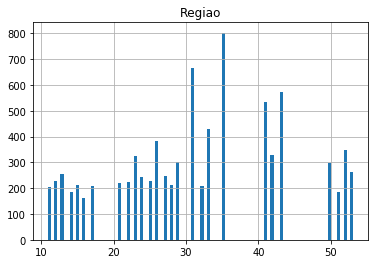

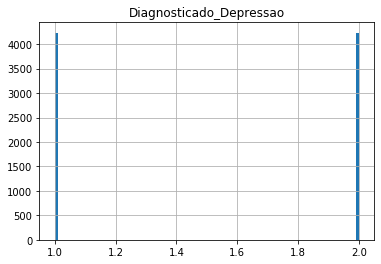

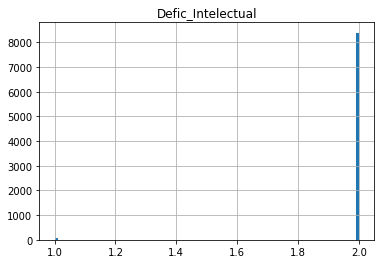

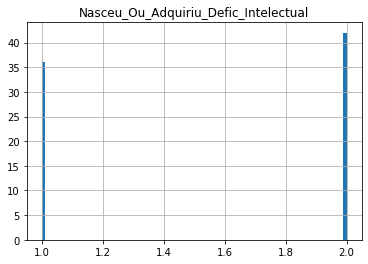

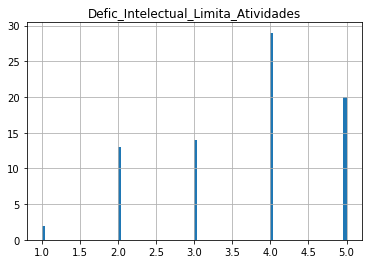

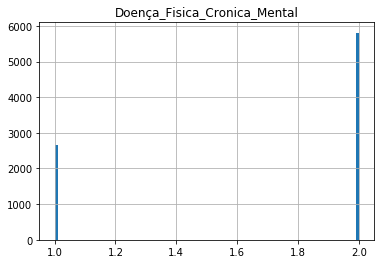

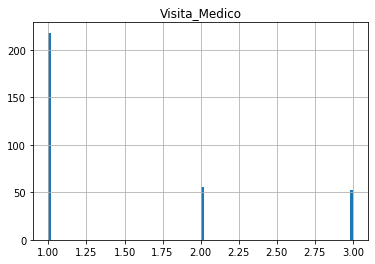

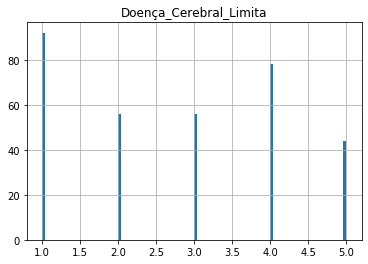

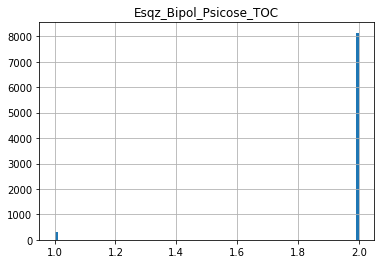

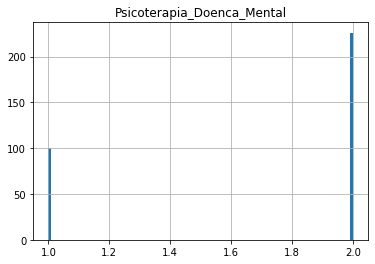

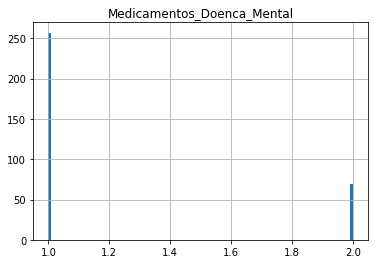

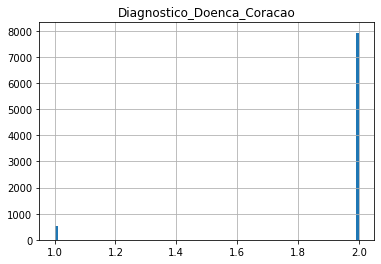

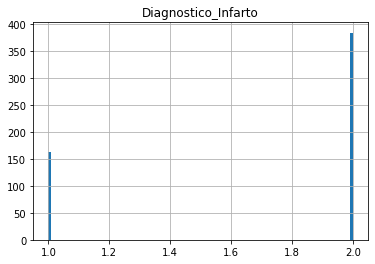

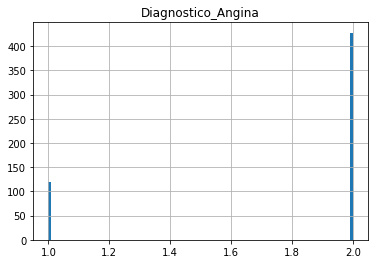

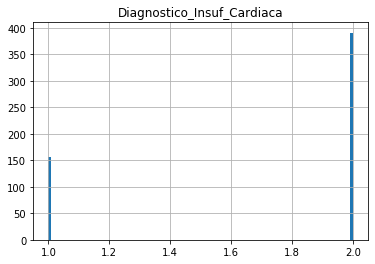

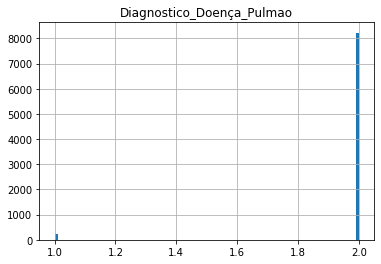

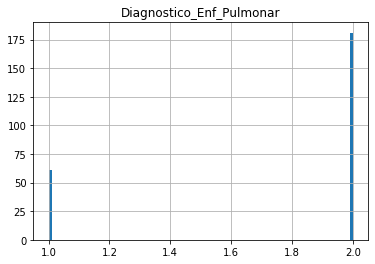

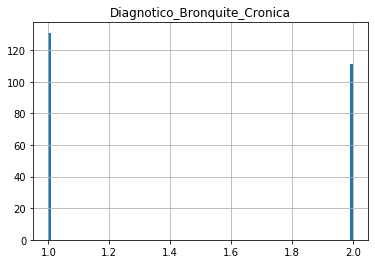

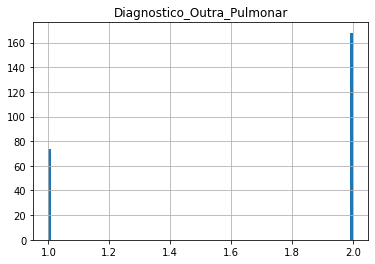

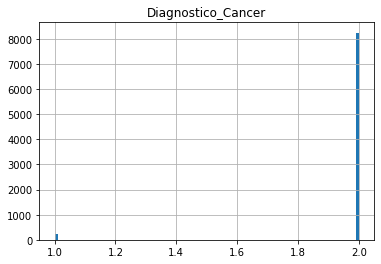

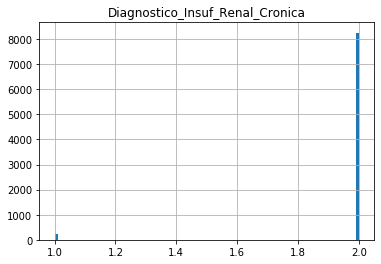

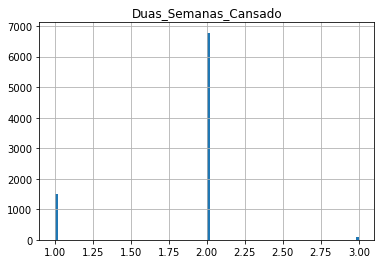

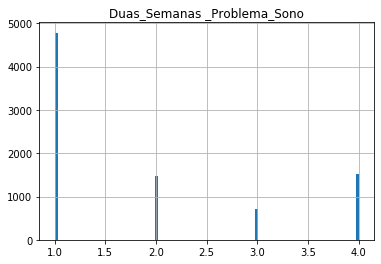

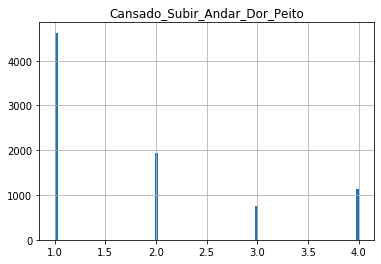

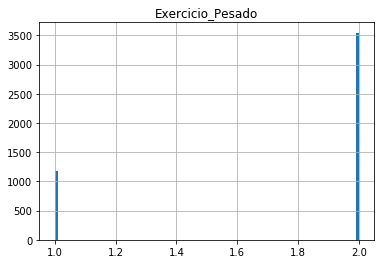

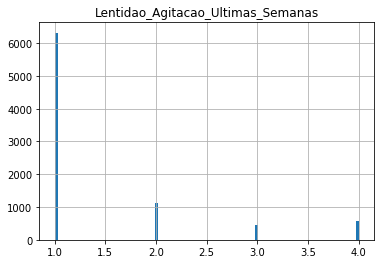

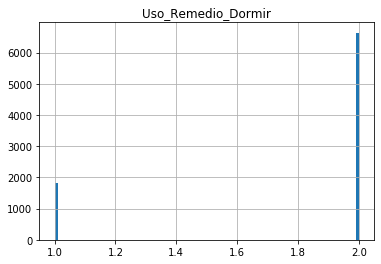

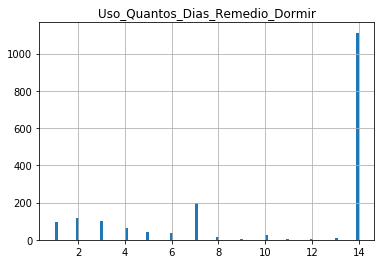

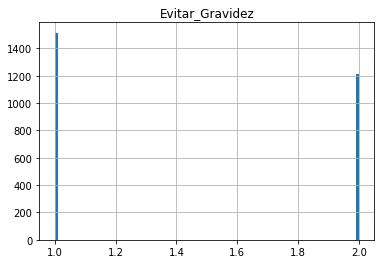

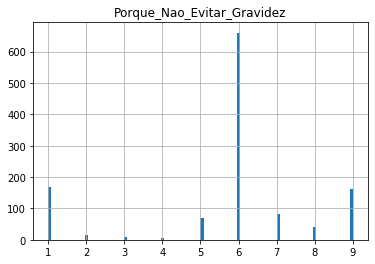

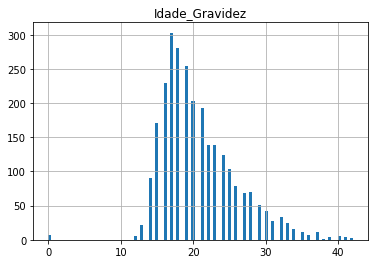

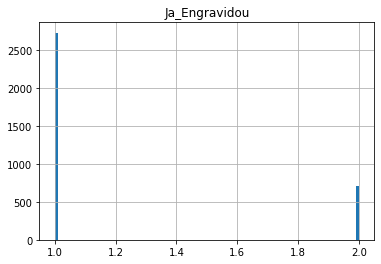

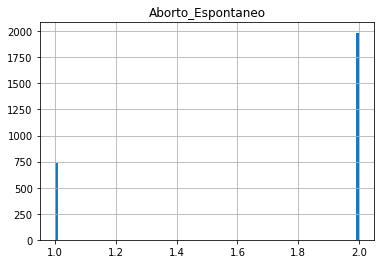

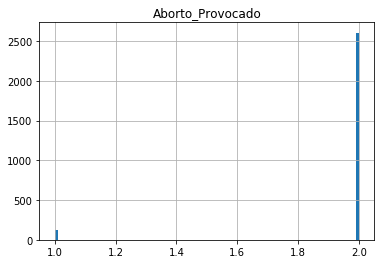

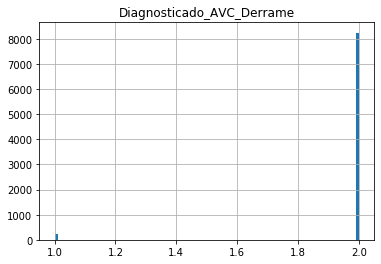

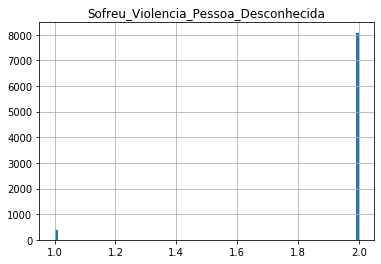

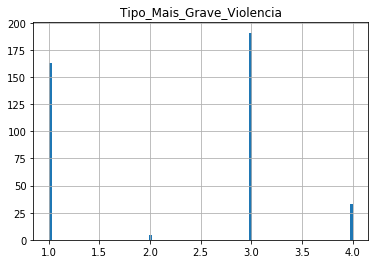

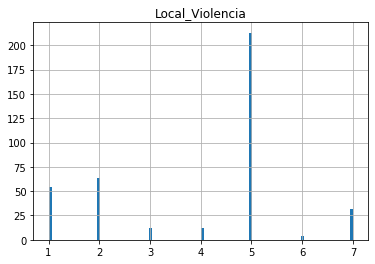

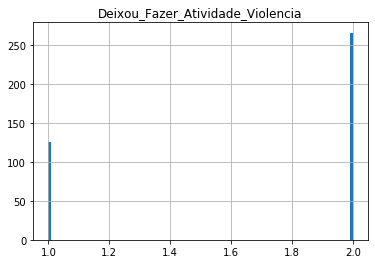

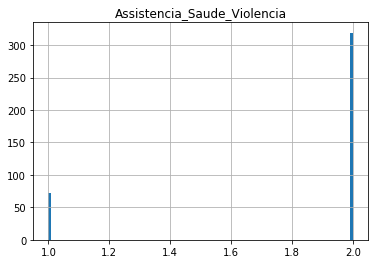

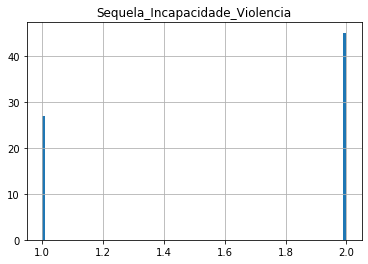

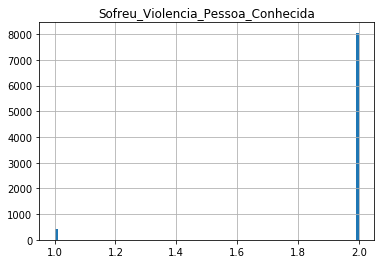

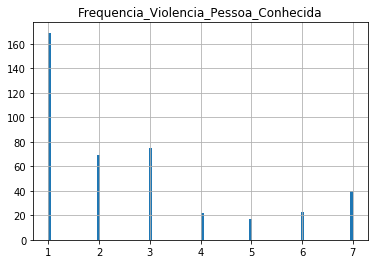

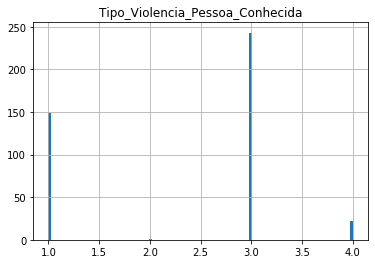

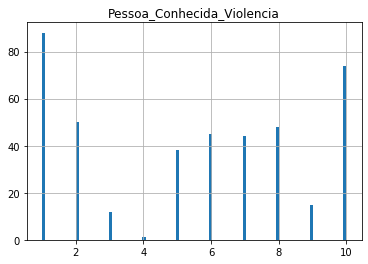

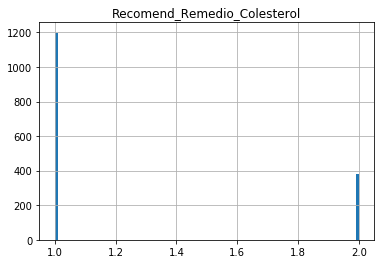

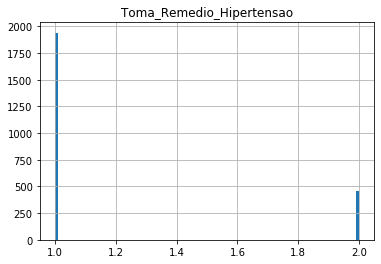

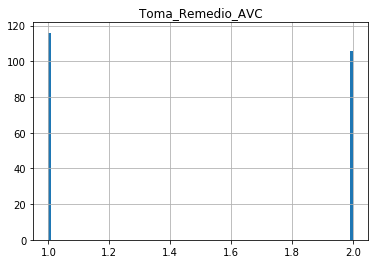

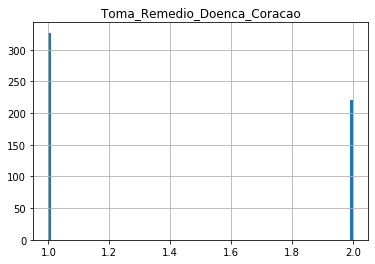

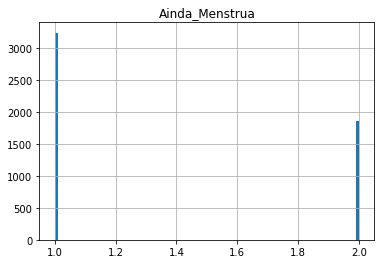

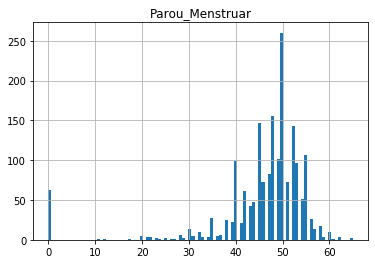

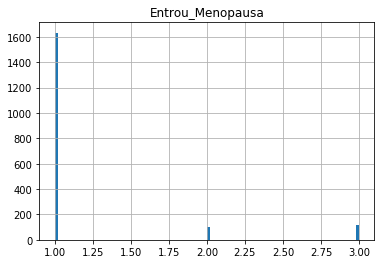

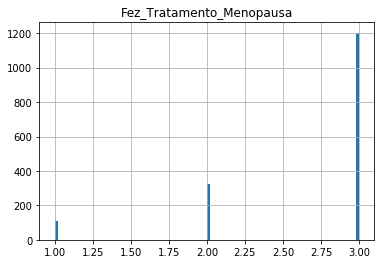

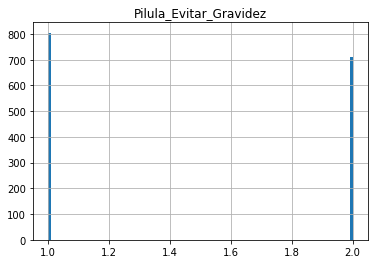

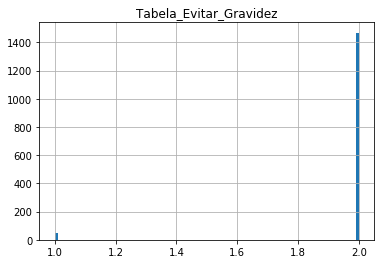

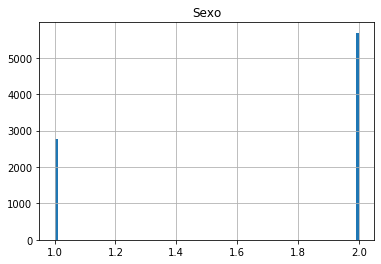

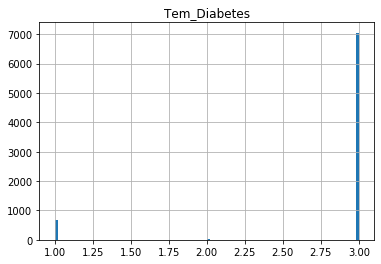

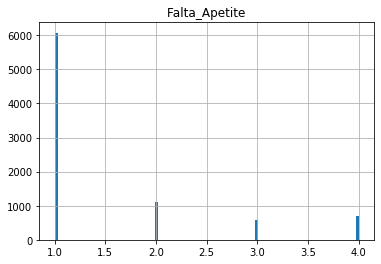

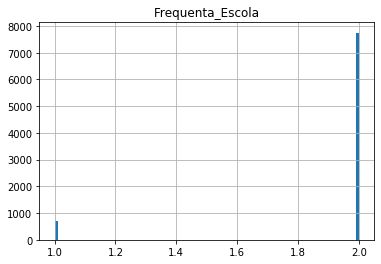

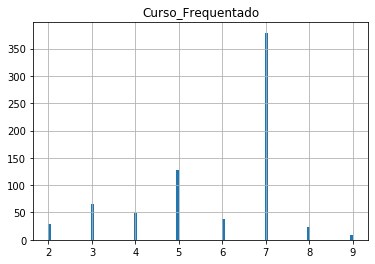

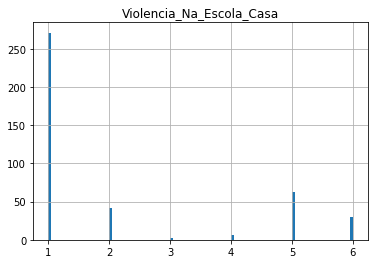

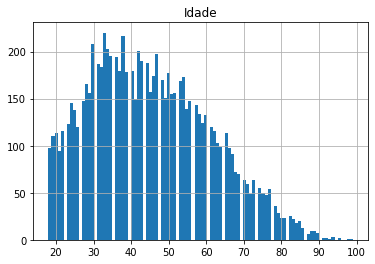

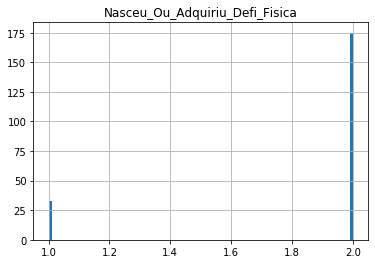

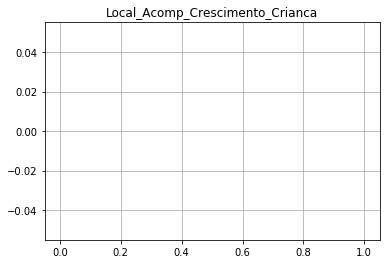

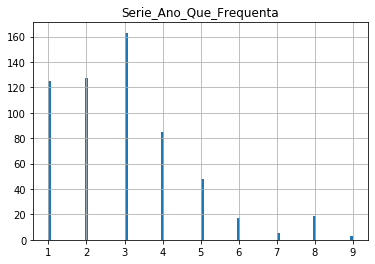

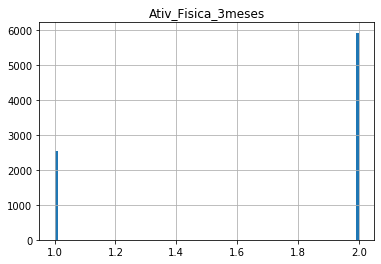

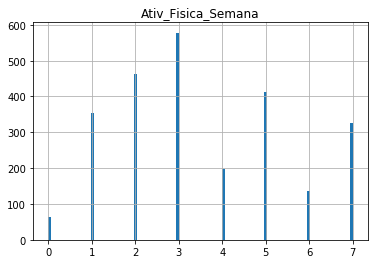

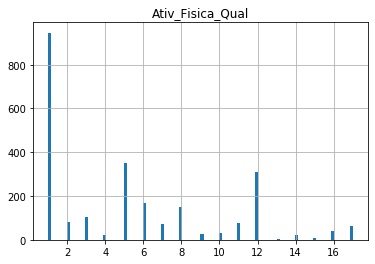

In [7]:
for col in list(df_sample):
    df_sample.hist(column=col, bins=100)

## Atributos Numéricos

- 1000 amostras selecionadas aleatoriamente para análise

In [8]:
df_numeric = df_sample.sample(1000)

### Intervalo de Confiança

(a) Idade;  
(b) Parou de menstruar;  
(c) Uso por quantos dias de remédio para dormir;  
(d) Idade da gravidez.

In [9]:
z = 2.054 # 96%
s = df_numeric['Idade'].std()
m = df_numeric['Idade'].mean() 
n = df_numeric.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

44.456336444973346 < 45.511 < 46.56566355502666


In [10]:
z = 2.054 # 96%
s = df_numeric['Parou_Menstruar'].std()
m = df_numeric['Parou_Menstruar'].mean() 
n = df_numeric.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

43.70761878570081 < 44.49238578680203 < 45.277152787903255


In [11]:
z = 2.054 # 96%
s = df_numeric['Uso_Quantos_Dias_Remedio_Dormir'].std()
m = df_numeric['Uso_Quantos_Dias_Remedio_Dormir'].mean() 
n = df_numeric.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

9.686131587202906 < 10.018018018018019 < 10.349904448833131


In [12]:
z = 2.054 # 96%
s = df_numeric['Idade_Gravidez'].std()
m = df_numeric['Idade_Gravidez'].mean() 
n = df_numeric.shape[0]
p1 = m - (z * (s/math.sqrt(n)))
p2 = m + (z * (s/math.sqrt(n)))
print("{} < {} < {}".format(p1,m,p2))

20.337927389353204 < 20.69113149847095 < 21.044335607588692


### Poder Discriminativo de variáveis

(a) Idade;  
(b) Parou de menstruar;  
(c) Uso por quantos dias de remédio para dormir;  
(d) Idade da gravidez.

In [13]:
df_sample1 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Idade'].std()
m1 = df_sample1['Idade'].mean()
n1 = df_sample1['Idade'].count()

df_sample2 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Idade'].std()
m2 = df_sample2['Idade'].mean()
n2 = df_sample2['Idade'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = (m1 - m2)/t

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 3.7959454965599746 > 0.5 ?


In [14]:
df_sample1 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Parou_Menstruar'].std()
m1 = df_sample1['Parou_Menstruar'].mean()
n1 = df_sample1['Parou_Menstruar'].count()

df_sample2 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Parou_Menstruar'].std()
m2 = df_sample2['Parou_Menstruar'].mean()
n2 = df_sample2['Parou_Menstruar'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 1.2239430858782059 > 0.5 ?


In [15]:
df_sample1 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Uso_Quantos_Dias_Remedio_Dormir'].std()
m1 = df_sample1['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n1 = df_sample1['Uso_Quantos_Dias_Remedio_Dormir'].count()

df_sample2 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Uso_Quantos_Dias_Remedio_Dormir'].std()
m2 = df_sample2['Uso_Quantos_Dias_Remedio_Dormir'].mean()
n2 = df_sample2['Uso_Quantos_Dias_Remedio_Dormir'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 2.4332818616501384 > 0.5 ?


In [16]:
df_sample1 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 1]
s1 = df_sample1['Idade_Gravidez'].std()
m1 = df_sample1['Idade_Gravidez'].mean()
n1 = df_sample1['Idade_Gravidez'].count()

df_sample2 = df_numeric.loc[df_numeric['Diagnosticado_Depressao'] == 2]
s2 = df_sample2['Idade_Gravidez'].std()
m2 = df_sample2['Idade_Gravidez'].mean()
n2 = df_sample2['Idade_Gravidez'].count()

sa = math.pow(s1,2)/n1
sb = math.pow(s2,2)/n2

t = math.sqrt(sa + sb)
limiar = abs((m1 - m2)/t)

print("Limiar : {} > {} ?".format(limiar,0.5))

Limiar : 1.4723420303619945 > 0.5 ?


### Outliers

In [17]:
df_numeric = df_sample[['Idade', 'Parou_Menstruar', 'Uso_Quantos_Dias_Remedio_Dormir', 'Idade_Gravidez']]
limiar = 3 * df_numeric.std()
mean = df_numeric.mean()
outliers = (df_numeric < mean - limiar) | (df_numeric > mean + limiar)
outliers.describe()

,Idade,Parou_Menstruar,Uso_Quantos_Dias_Remedio_Dormir,Idade_Gravidez
count,8470,8470,8470,8470
unique,2,2,1,2
top,False,False,False,False
freq,8463,8406,8470,8434
